In [1]:
%matplotlib inline

from pml_utils import get_mnist, show_failures

import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
sns.set()

In [2]:
X_train, y_train, X_test, y_test = get_mnist('MNIST')

print('MNIST data loaded: train:',len(X_train),'test:',len(X_test))
print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('X_test', X_test.shape)
print('y_test', y_test.shape)

Not downloading, file already exists: MNIST/train-images-idx3-ubyte
Not downloading, file already exists: MNIST/train-labels-idx1-ubyte
Not downloading, file already exists: MNIST/t10k-images-idx3-ubyte
Not downloading, file already exists: MNIST/t10k-labels-idx1-ubyte
MNIST data loaded: train: 60000 test: 10000
X_train: (60000, 784)
y_train: (60000,)
X_test (10000, 784)
y_test (10000,)


In [9]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [12]:
rng = np.random.RandomState(1)
X = np.linspace(0, 6, 100)[:, np.newaxis]
y = np.sin(X).ravel() + np.sin(6 * X).ravel() + rng.normal(0, 0.1, X.shape[0])
print(X.shape)
print(y.shape)

(100, 1)
(100,)


In [17]:
import pandas as pd

# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=4)

rng = np.random.RandomState(1)
regr_2 = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4),
                          n_estimators=300, random_state=rng)

regr_1.fit(X_train, y_train)
regr_2.fit(X_train, pd.to_numeric(y_train))

# Predict
y_1 = regr_1.predict(X_train)
y_2 = regr_2.predict(X_train)

/opt/conda/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


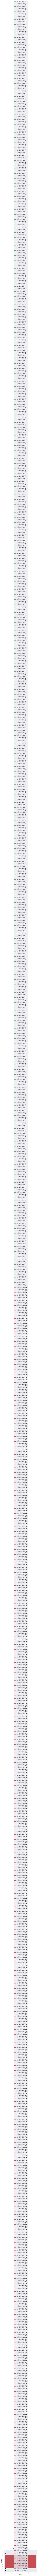

In [20]:
# Plot the results
plt.figure()
plt.scatter(X_train[:,0], y_train, c="k", label="training samples")
plt.plot(X_train, y_1, c="g", label="n_estimators=1", linewidth=2)
plt.plot(X_train, y_2, c="r", label="n_estimators=300", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Boosted Decision Tree Regression")
plt.legend()
plt.show()

# Bagging

In [12]:
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.ensemble import BaggingRegressor

# define the model
model = BaggingRegressor()
# evaluate the model
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=1, error_score='raise')
# report performance
print('MAE: ',mean(n_scores),' ', std(n_scores)))

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_regression.py:85: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  y_true = check_array(y_true, ensure_2d=False, dtype=dtype)


UFuncTypeError: ufunc 'subtract' did not contain a loop with signature matching types (dtype('<U32'), dtype('<U32')) -> dtype('<U32')

In [15]:
import random
# list of random in between a range 0 to 10
randomIntList = []

for i in range(0, 784):
    x = random.randint(0, 10)
    randomIntList.append(x)
randomIntList

[8,
 7,
 2,
 5,
 9,
 0,
 1,
 0,
 10,
 4,
 6,
 7,
 6,
 3,
 7,
 9,
 4,
 9,
 7,
 7,
 7,
 9,
 3,
 7,
 9,
 1,
 4,
 4,
 4,
 2,
 1,
 1,
 0,
 3,
 4,
 7,
 3,
 4,
 7,
 5,
 9,
 0,
 10,
 6,
 2,
 2,
 6,
 6,
 5,
 7,
 0,
 6,
 5,
 8,
 4,
 8,
 3,
 10,
 9,
 5,
 9,
 6,
 2,
 0,
 9,
 7,
 1,
 7,
 5,
 4,
 8,
 9,
 1,
 6,
 8,
 0,
 9,
 2,
 9,
 7,
 8,
 8,
 3,
 4,
 2,
 0,
 5,
 5,
 9,
 3,
 7,
 10,
 1,
 3,
 5,
 0,
 3,
 9,
 6,
 6,
 2,
 4,
 1,
 6,
 2,
 0,
 5,
 10,
 2,
 8,
 1,
 7,
 8,
 8,
 1,
 0,
 2,
 4,
 6,
 3,
 2,
 1,
 3,
 8,
 3,
 6,
 4,
 1,
 7,
 7,
 3,
 10,
 5,
 7,
 3,
 8,
 3,
 6,
 10,
 6,
 9,
 9,
 8,
 2,
 6,
 7,
 5,
 7,
 1,
 1,
 3,
 7,
 2,
 8,
 10,
 8,
 0,
 0,
 7,
 0,
 5,
 3,
 9,
 2,
 3,
 8,
 5,
 0,
 5,
 9,
 9,
 2,
 10,
 2,
 1,
 0,
 5,
 0,
 10,
 0,
 7,
 8,
 2,
 3,
 6,
 10,
 6,
 4,
 3,
 1,
 6,
 2,
 1,
 3,
 9,
 6,
 7,
 5,
 7,
 4,
 3,
 1,
 9,
 1,
 2,
 10,
 3,
 2,
 5,
 5,
 8,
 4,
 2,
 7,
 8,
 10,
 3,
 6,
 0,
 9,
 4,
 7,
 9,
 1,
 0,
 8,
 8,
 0,
 7,
 5,
 1,
 5,
 5,
 2,
 7,
 2,
 7,
 8,
 1,
 7,
 6,
 7,
 1,
 6,
 9,
 1,
 3,

In [20]:
# fit the model on the whole dataset
model.fit(X_train, y_train)
# make a single prediction
yhat = model.predict(X_train)
print('Prediction: %d' % yhat[0])

Prediction: 7
